## Necessary libraries

In [1]:
import os
import matplotlib.pyplot as plt
import sys
import numpy as np
import pandas as pd
import cv2

In [2]:
WORK_DIR = '.'

# If you don't work on Jupyter, just comment below lines
WORK_DIR = '../'
sys.path.append('..')

In [3]:
from utils import data
from config import cfg

## Example image

In [4]:
metadata = pd.read_csv(os.path.join(WORK_DIR, cfg.routes['data_dir'], 'metadata.csv'), index_col=0)
metadata.head()

,class,path_flair_image,path_t1_image,path_mask_brain,path_mask_segmentation
id,,,,,
1,0,AR-1/ax CUBE flair ar-1_2.mhd,AR-1/AX T1 3D ar-1.mhd,brain_masks/ar-1.npy,AR-1/Segmentation-label.mhd
2,0,AR-2/AX FLAIR AR 2.mhd,AR-2/AX T1 AR-2.mhd,brain_masks/ar-2.npy,AR-2/Segmentation_1-label.mhd
3,0,AR-3/Ax 3D Cube FLAIR AR-3.mhd,AR-3/AX T1 3DC AR-3.mhd,brain_masks/ar-3.npy,AR-3/Segmentation_2-label.mhd
4,0,AR-4/ax flair AR-4.mhd,AR-4/AX T1 AR-4.mhd,brain_masks/ar-4.npy,AR-4/Segmentation-label_1.mhd
6,0,AR-6/AX FLAIR AR-6.mhd,AR-6/AX T1 AR-6_1.mhd,brain_masks/ar-6.npy,AR-6/Segmentation-label.mhd


In [5]:
row = metadata[['path_flair_image', 'path_t1_image', 'path_mask_brain', 'path_mask_segmentation']].values[0]

flair_example = data.load_itk(os.path.join(WORK_DIR, cfg.routes['data_dir'], row[0]))
t1_example = data.load_itk(os.path.join(WORK_DIR, cfg.routes['data_dir'], row[1]))

brain_mask = np.load(os.path.join(WORK_DIR, cfg.routes['data_dir'], row[2]))
segmentation_mask = data.load_itk(os.path.join(WORK_DIR, cfg.routes['data_dir'], row[3]))

In [6]:
print('Flair image size:', flair_example[0].shape)
print('T1 image size:', t1_example[0].shape)

Flair image size: (512, 512, 252)
T1 image size: (320, 256, 256)


## Displaying an Image Stack

In [7]:
init_image = flair_example[0]
brain = flair_example[0] * brain_mask
segmentation = segmentation_mask[0]

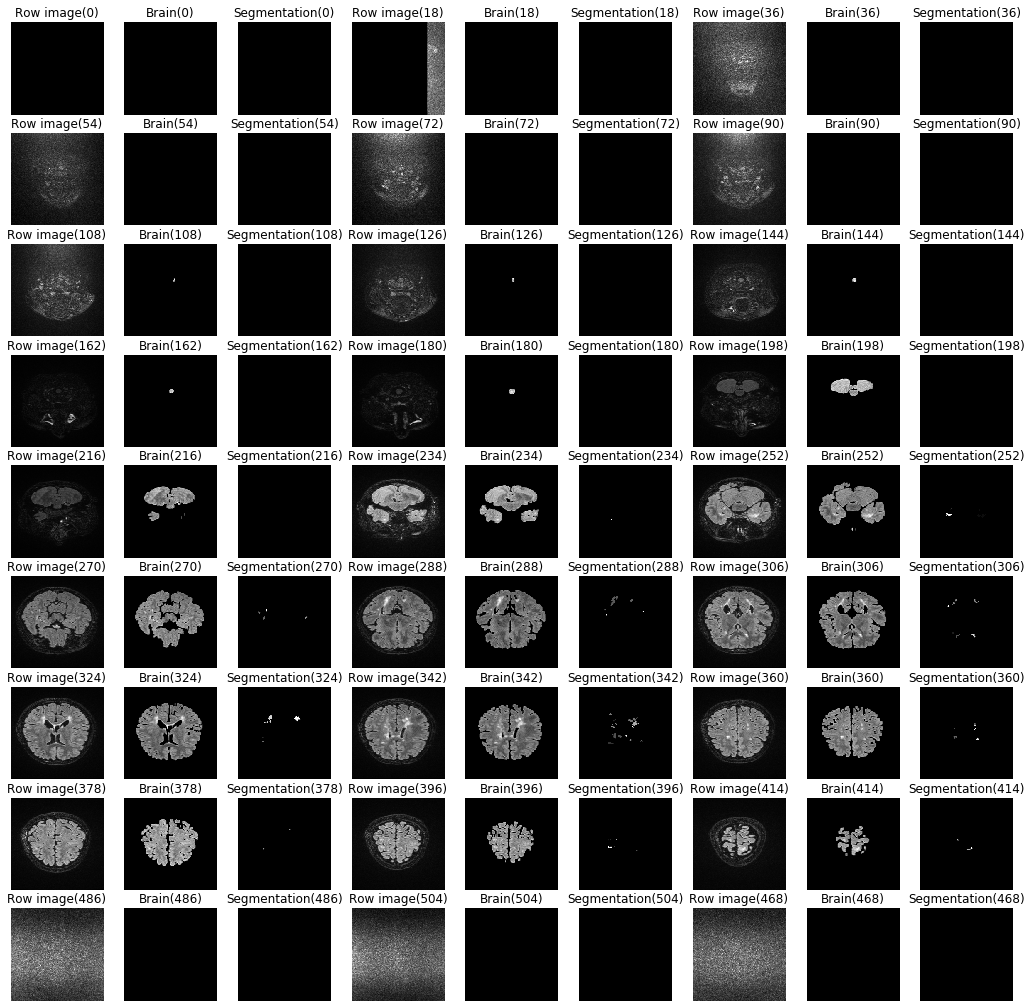

In [8]:
data.show_slices_from_images(n_images=3, images=[init_image, brain, segmentation], plane='axial',
                             titles=['Row image', 'Brain', 'Segmentation'], plt=plt, rows=9, cols=9)